## Import the Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, recall_score, f1_score
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
# # import relevant modules
# %matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
# pd.set_option('display.max_columns', None)
# np.set_printoptions(threshold=np.nan)
# np.set_printoptions(precision=3)
# sns.set(style="darkgrid")
# plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12

## Load the data

In [2]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

## Get discriptive stats

In [3]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

num_outbound_cmds
0    25192
Name: count, dtype: int64
num_outbound_cmds
0    22544
Name: count, dtype: int64


## Remove empty column

In [6]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

## Plot label distribution - looks balanced

class
normal     13449
anomaly    11743
Name: count, dtype: int64


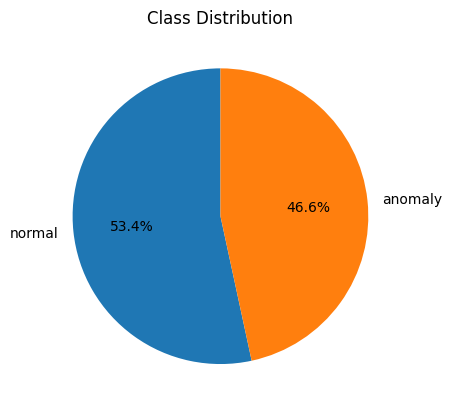

In [7]:
# Value counts
class_counts = train['class'].value_counts()
print(class_counts)

# Plotting
fig, ax = plt.subplots()
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=class_counts.index)
ax.set_ylabel('')
ax.set_title('Class Distribution')
plt.show()

## Normalize numeric columns

In [8]:
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

## Encode categorical columns

In [9]:
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

## Separate label

In [10]:
# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

## Concat numeric and categorical columns to get training and testing sets

In [11]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = cat_Ytrain
train_x.shape

(25192, 40)

In [12]:
train_y.shape

(25192, 1)

In [13]:
test_x = pd.concat([sc_testdf,testcat],axis=1)
test_x.shape

(22544, 40)

## Define Classifiers

In [14]:
# Define your classifiers
clf1 = RandomForestClassifier(n_estimators=40, random_state=1)
clf2 = AdaBoostClassifier(n_estimators=50, random_state=1)
clf3 = GradientBoostingClassifier(n_estimators=50, random_state=1)
clf4 = LogisticRegression(max_iter=1000, random_state=1)  # Increased max_iter for convergence
clf5 = SVC(probability=True, random_state=1)  # Enabled probability for consistency in scoring
clf6 = DecisionTreeClassifier(random_state=1)
clf7 = MLPClassifier(random_state=1, max_iter=1000)  # Increased max_iter for better convergence

## Random Forest Results

Random Forest - Training Accuracy: 0.9999603048586853
Random Forest - Training Recall: 0.9999256450293702
Random Forest - Training F1 Score: 0.9999628211324684


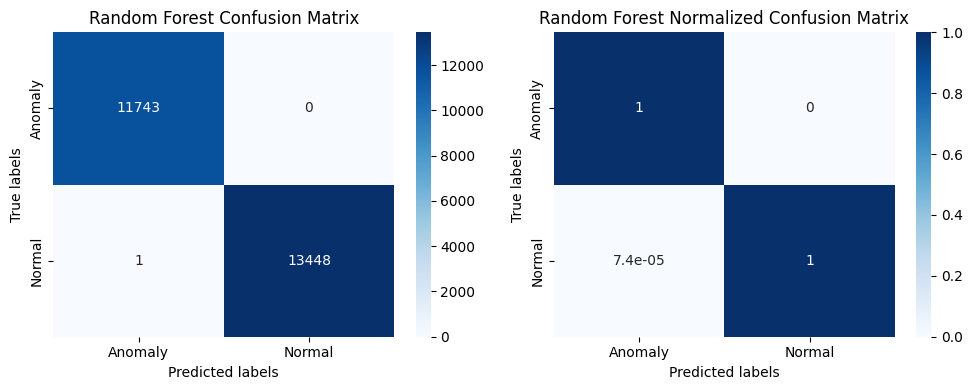

AdaBoost - Training Accuracy: 0.9881311527469038
AdaBoost - Training Recall: 0.9927875678489106
AdaBoost - Training F1 Score: 0.9889271562418991


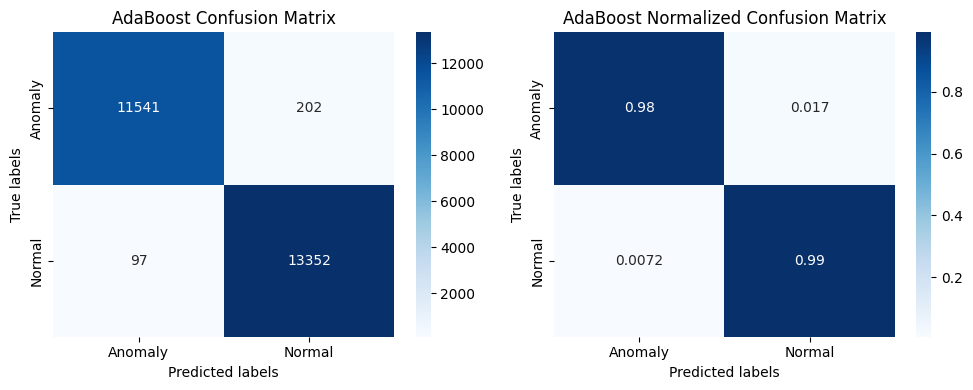

Gradient Boosting - Training Accuracy: 0.9924976182915212
Gradient Boosting - Training Recall: 0.995464346791583
Gradient Boosting - Training F1 Score: 0.9929909141479696


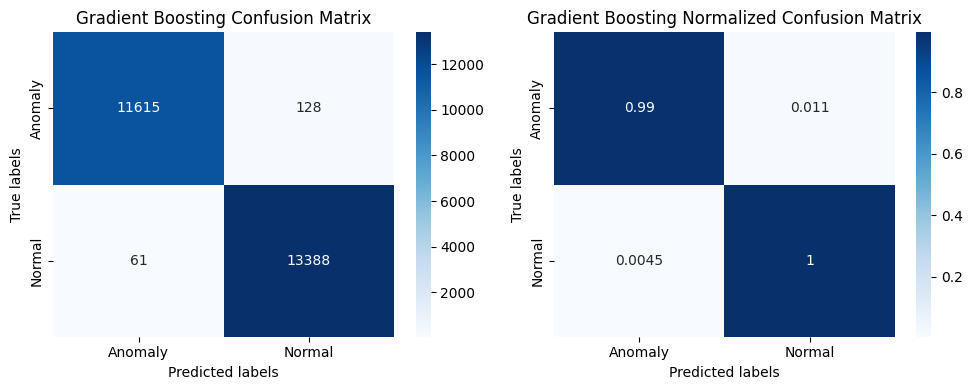

Logistic Regression - Training Accuracy: 0.9540330263575738
Logistic Regression - Training Recall: 0.965871068480928
Logistic Regression - Training F1 Score: 0.9573292062790184


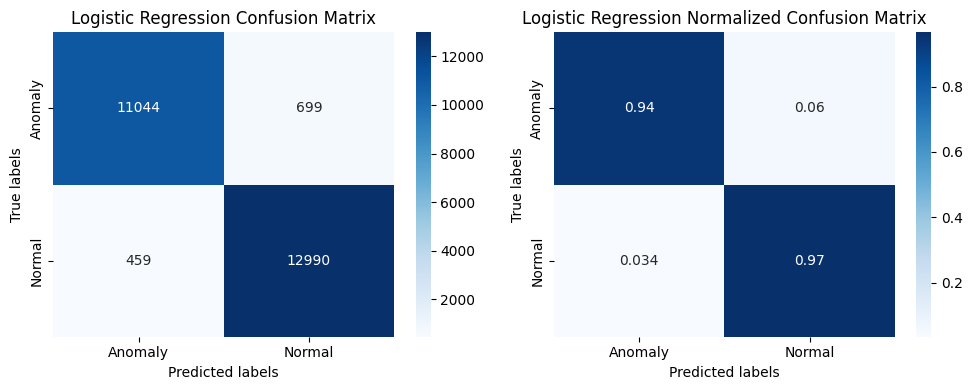

SVM - Training Accuracy: 0.9645919339472848
SVM - Training Recall: 0.9884006245817533
SVM - Training F1 Score: 0.9675376664968337


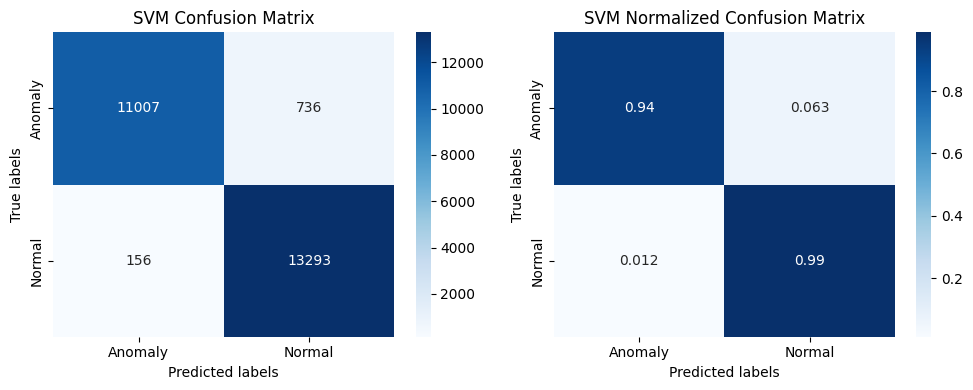

Decision Tree - Training Accuracy: 0.9999603048586853
Decision Tree - Training Recall: 0.9999256450293702
Decision Tree - Training F1 Score: 0.9999628211324684


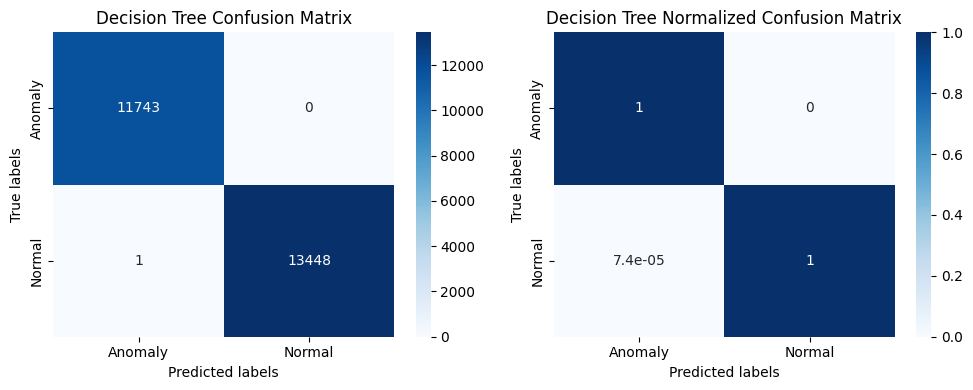

MLP - Training Accuracy: 0.9959510955859003
MLP - Training Recall: 0.9973232210573277
MLP - Training F1 Score: 0.9962121212121212


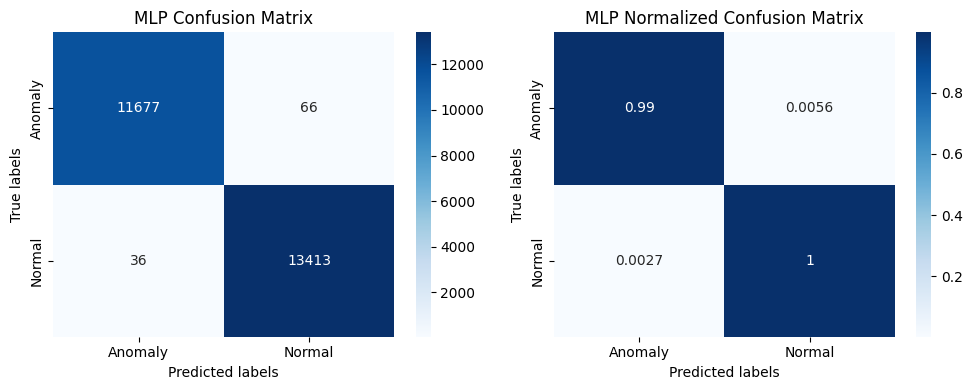

In [18]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Placeholder classifiers for demonstration
# In your code, these would be actual classifier instances like RandomForestClassifier(), SVC(), etc.
classifiers = {
    'Random Forest': clf1,
    'AdaBoost': clf2,
    'Gradient Boosting': clf3,
    'Logistic Regression': clf4,
    'SVM': clf5,
    'Decision Tree': clf6,
    'MLP': clf7
}

# Assuming train_x and train_y are your training data and labels
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(train_x, train_y)
    
    # Predict on the training data
    train_predictions = clf.predict(train_x)
    
    # Metrics
    train_accuracy = accuracy_score(train_y, train_predictions)
    train_recall = recall_score(train_y, train_predictions)
    train_f1 = f1_score(train_y, train_predictions)
    print(f"{name} - Training Accuracy: {train_accuracy}")
    print(f"{name} - Training Recall: {train_recall}")
    print(f"{name} - Training F1 Score: {train_f1}")
    
    # Confusion Matrix
    cm = confusion_matrix(train_y, train_predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Non-normalized confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title(f'{name} Confusion Matrix')
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels')
    ax[0].set_xticklabels(['Anomaly', 'Normal'], ha='center')
    ax[0].set_yticklabels(['Anomaly', 'Normal'], va='center')
    
    # Normalized confusion matrix
    sns.heatmap(cm_normalized, annot=True, cmap='Blues', ax=ax[1])
    ax[1].set_title(f'{name} Normalized Confusion Matrix')
    ax[1].set_xlabel('Predicted labels')
    ax[1].set_ylabel('True labels')
    ax[1].set_xticklabels(['Anomaly', 'Normal'], ha='center')
    ax[1].set_yticklabels(['Anomaly', 'Normal'], va='center')
    
    plt.tight_layout()
    plt.show()